In [1]:
# Imports
import numpy as np
import random
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from tensorflow.keras.preprocessing.image import img_to_array

from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split

import pickle

import cv2

import os
from os import listdir


### File path definition

In [6]:
# Base path to the images folder
# The file structure here is:
#    "Tomato_Leaves" - 
#        - "train"
#           - {Disease Name}
#               - {Disease Name} <- all images for the specific disease
#               - "Tomato_healthy" <- all healthy images copied into folder

# {Disease Folder Name}
# This will also be the name of the saved model
use_path = ""

# Path to the dataset folder
# Could change this to a relative path...
root_dir = os.path.abspath("../../Tomato_Leaves")

# All images will be located in sub directories 
# train/Tomato_healthy 
# train/{use_path variable}
train_dir = os.path.join(root_dir, "train\\", use_path)

### Image definition

In [3]:
# Dimension of resized image
DEFAULT_IMAGE_SIZE = tuple((256, 256))

# Number of images used to train the model
N_IMAGES = 370

### Numpy array 

In [4]:
# Return image as numpy array
def convert_image_to_array(image_dir):
    try:
        image = cv2.imread(image_dir)
        if image is not None:
            image = cv2.resize(image, DEFAULT_IMAGE_SIZE)   
            return img_to_array(image)
        else:
            return np.array([])
    except Exception as e:
        print(f"Error : {e}")
        return None

### Catagories based on folder names
 - use only one catagory at a time

In [7]:
# Load categorical jpg images
# Categories based on containing folder 

image_list, label_list = [], []

try:
    print("[INFO] Loading images ...")
    plant_disease_folder_list = listdir(train_dir)

    for plant_disease_folder in plant_disease_folder_list:
        print(f"[INFO] Processing {plant_disease_folder} ...")
        plant_disease_image_list = listdir(f"{train_dir}\\{plant_disease_folder}\\")

        for image in plant_disease_image_list[:N_IMAGES]:
            image_directory = f"{train_dir}/{plant_disease_folder}\{image}"
            if image_directory.endswith(".jpg")==True or image_directory.endswith(".JPG")==True:
                image_list.append(convert_image_to_array(image_directory))
                label_list.append(plant_disease_folder)

    print("[INFO] Image loading completed")  
except Exception as e:
    print(f"Error : {e}")

[INFO] Loading images ...
[INFO] Processing Bacterial_spot ...
[INFO] Processing Early_blight ...
[INFO] Processing Healthy ...
[INFO] Processing Late_blight ...
[INFO] Processing Leaf_Mold ...
[INFO] Processing Mosaic_virus ...
[INFO] Processing Septoria_leaf_spot ...
[INFO] Processing Target_Spot ...
[INFO] Processing Two_spotted_spider_mite ...
[INFO] Processing YellowLeaf__Curl_Virus ...
[INFO] Image loading completed


### Numpy image list

In [8]:
# Transform the loaded training image data into numpy array
# Note: dtype=np.uint8 is supported for images
np_image_list = np.array(image_list, dtype=np.uint8) / 256
print()

# Check the number of images loaded for training
image_len = len(image_list)
print(f"Total number of images: {image_len}")


Total number of images: 3700


### Binary pickle for classification names

In [9]:
# Save binary labels to pickle file

label_binarizer = LabelBinarizer()
image_labels = label_binarizer.fit_transform(label_list)

pickle.dump(label_binarizer,open('plant_disease_label_transform.pkl', 'wb'))
n_classes = len(label_binarizer.classes_)

print("Total number of classes: ", n_classes)
for nm in label_binarizer.classes_:
    print("Class name = ", nm)


Total number of classes:  10
Class name =  Bacterial_spot
Class name =  Early_blight
Class name =  Healthy
Class name =  Late_blight
Class name =  Leaf_Mold
Class name =  Mosaic_virus
Class name =  Septoria_leaf_spot
Class name =  Target_Spot
Class name =  Two_spotted_spider_mite
Class name =  YellowLeaf__Curl_Virus


In [10]:
# double check the image shape
np_image_list.shape

(3700, 256, 256, 3)

In [11]:
# Split the data for training
print("[INFO] Splitting data to train and test...")
x_train, x_test, y_train, y_test = train_test_split(np_image_list, image_labels, test_size=0.2, random_state = 42) 

[INFO] Splitting data to train and test...


In [12]:
# Verify training split
print("Shape of X_train: ", x_train.shape)
print("Shape of X_test: ", x_test.shape)
print("Shape of Y_train: ", y_train.shape)
print("Shape of Y_test: ", y_test.shape)

Shape of X_train:  (2960, 256, 256, 3)
Shape of X_test:  (740, 256, 256, 3)
Shape of Y_train:  (2960, 10)
Shape of Y_test:  (740, 10)


In [13]:
# Prepare the model layers
model = Sequential()

model.add(Conv2D(32, (3,3), activation='relu', input_shape = (256,256,3)))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(64, activation = 'relu'))
model.add(Dense(10, activation='sigmoid'))

In [21]:
# Compile the model
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      9248      


                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 123008)            0         
                                                                 
 dense (Dense)               (None, 64)                7872576   
                                                                 
 dense_1 (Dense)             (None, 10)                650       
                                                                 
Total params: 7883370 (30.07 MB)
Trainable params: 7883370 (30.07 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [22]:
# Train the model
hist = model.fit(x_train,y_train,epochs=10,batch_size=37)

Epoch 1/10
80/80 [==============================] - 78s 884ms/step - loss: 0.0902 - accuracy: 0.8666
Epoch 2/10
80/80 [==============================] - 69s 867ms/step - loss: 0.0544 - accuracy: 0.9341
Epoch 3/10
80/80 [==============================] - 77s 965ms/step - loss: 0.0310 - accuracy: 0.9726
Epoch 4/10
80/80 [==============================] - 72s 893ms/step - loss: 0.0196 - accuracy: 0.9875
Epoch 5/10
80/80 [==============================] - 73s 918ms/step - loss: 0.0143 - accuracy: 0.9926
Epoch 6/10
80/80 [==============================] - 75s 937ms/step - loss: 0.0081 - accuracy: 0.9976
Epoch 7/10
80/80 [==============================] - 70s 872ms/step - loss: 0.0057 - accuracy: 0.9993
Epoch 8/10
80/80 [==============================] - 70s 873ms/step - loss: 0.0020 - accuracy: 1.0000
Epoch 9/10
80/80 [==============================] - 73s 915ms/step - loss: 0.0014 - accuracy: 1.0000
Epoch 10/10
80/80 [==============================] - 70s 879ms/step - loss: 4.4689e-04 - ac

In [23]:
hist.history.keys()

dict_keys(['loss', 'accuracy'])

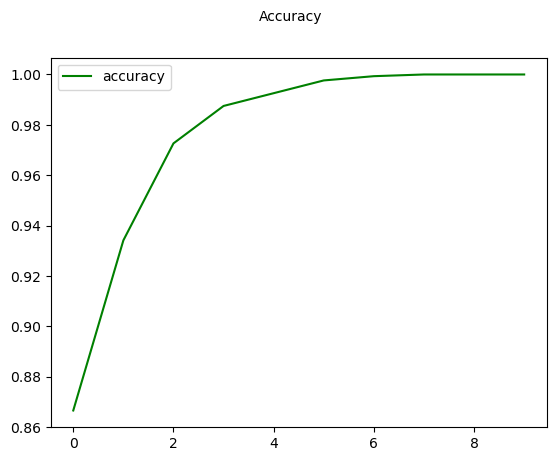

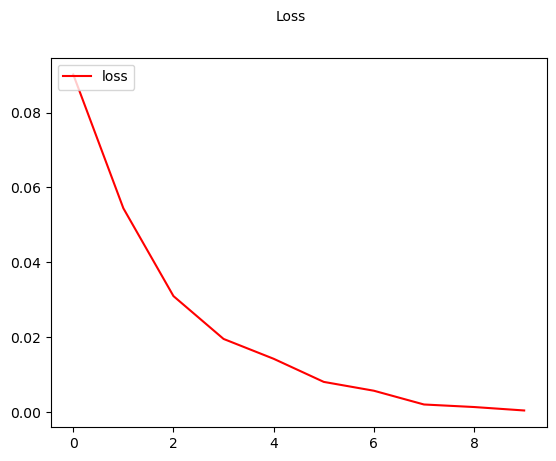

In [24]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='green', label='accuracy')
fig.suptitle('Accuracy', fontsize=10)
plt.legend(loc="upper left")
plt.show()

fig = plt.figure()
plt.plot(hist.history['loss'], color='red', label='loss')
fig.suptitle('Loss', fontsize=10)
plt.legend(loc="upper left")
plt.show()

In [25]:
tst = model.evaluate(x_test,y_test)
tst

24/24 [==============================] - 4s 162ms/step - loss: 0.2261 - accuracy: 0.7676


[0.22612068057060242, 0.7675675749778748]

In [26]:
model.save("../../Tomato_Leaves/train/all_cat.h5")

c:\Users\scorp\anaconda3\envs\dev\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
